In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Prepare Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import trefide.preprocess as preprocess
import scipy.io as io

In [3]:
# Load Data
stim = io.loadmat("../../data/sampleMovie.mat")['stimulationSignal'][1:-50].squeeze()
data = io.loadmat("../../data/post_demix.mat")
N, T = data['C'].shape
signals = data['C']

In [4]:
signals, trends, stim, disc_idx = preprocess.detrend(signals, stim, disc_idx=np.array([5]))

In [5]:
signals = signals.copy() # make sure signals contiguous in memory

In [6]:
T = len(stim)
idx = np.random.randint(0, N)
signal = signals[idx,:]

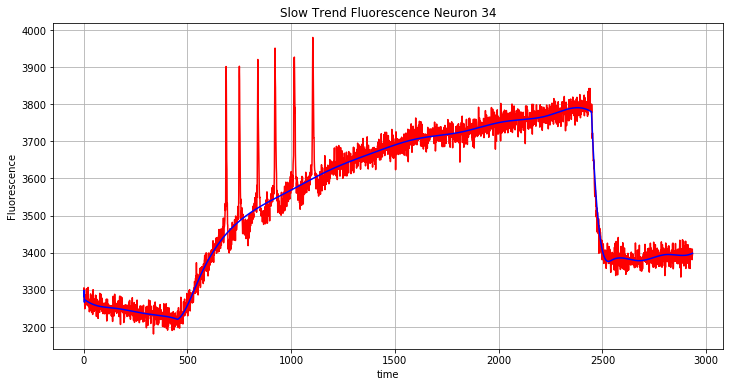

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(T), signal+trends[idx,:], 'r')
ax.plot(np.arange(T), trends[idx,:], 'b')

ax.set(xlabel='time', ylabel='Fluorescence',
       title='Slow Trend Fluorescence Neuron {}'.format(idx+1))
ax.grid()

plt.show()

# Compare Noise Estimates To The Real signal

Below we simulate gaussian noise with variance matching the variance estimated from each input signal in order to provide a visual comparison.

In [8]:
from trefide.utils import psd_noise_estimate

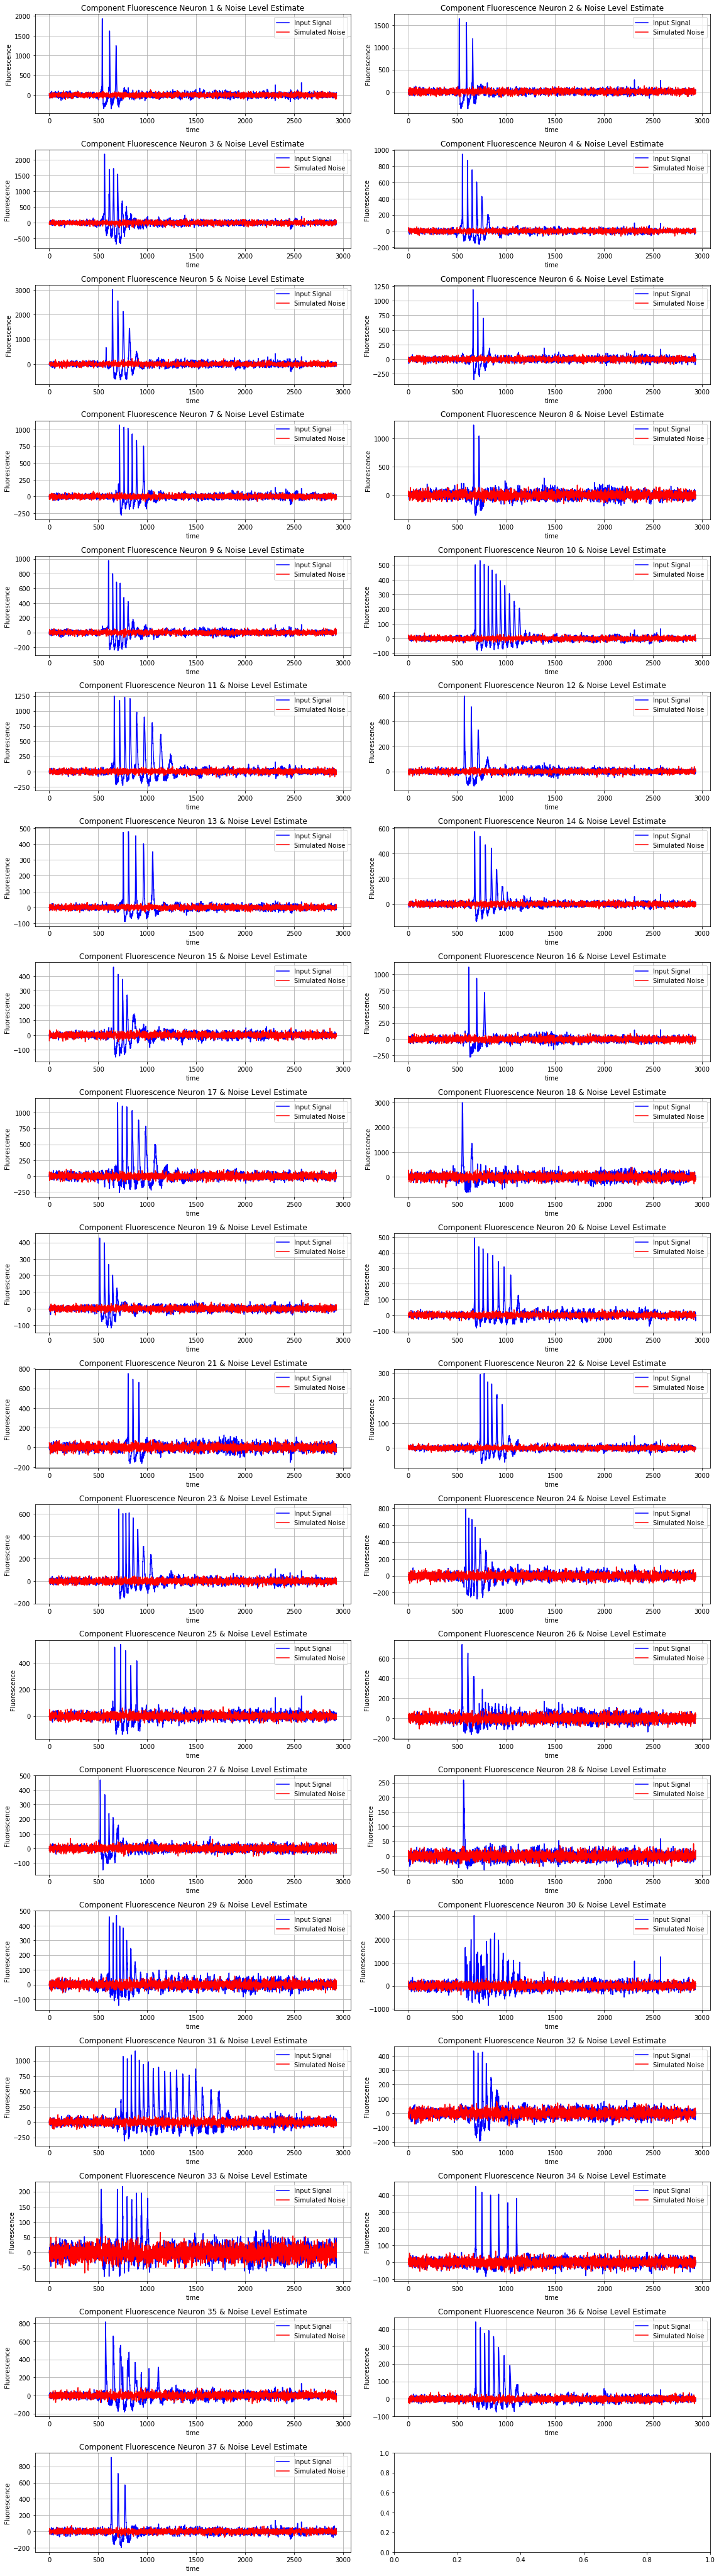

In [9]:
fig, ax = plt.subplots(nrows=int(np.ceil(len(signals)/2)), ncols=2, figsize=(16, 3 * np.ceil(len(signals)/2)))

var_hat = psd_noise_estimate(signals)
noise_traces = np.diag(np.sqrt(var_hat)).dot(np.random.randn(N*T).T.reshape((N,T)))
for idx, (signal, noise) in enumerate(zip(signals, noise_traces)):
    
    ax[int(np.floor(idx/2)), int(idx%2)].plot(np.arange(T), signal, 'b')
    ax[int(np.floor(idx/2)), int(idx%2)].plot(np.arange(T), noise, 'r')
    ax[int(np.floor(idx/2)), int(idx%2)].set(xlabel='time', ylabel='Fluorescence',
                    title='Component Fluorescence Neuron {} & Noise Level Estimate'.format(idx+1))
    ax[int(np.floor(idx/2)), int(idx%2)].grid()
    ax[int(np.floor(idx/2)), int(idx%2)].legend(['Input Signal', 'Simulated Noise' ])

plt.tight_layout()
plt.show()